# <center><h2>911 Calls Capstone Project</h2><center>

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Data and Setup

In [1]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Loading data from csv file
df = pd.read_csv('911.csv')

In [3]:
# Knowing More About our data via info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# Dataframe
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [5]:
df['zip'].value_counts().head(5)  # Top 5 Zipcodes for 911 calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head(5)  # Top 5 Townships (twp) for 911 calls

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique()  # Total Unique Titles

110

### Feature Engineering

In [8]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [9]:
# The Most Common Reason for a 911 call based off of a Reason
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

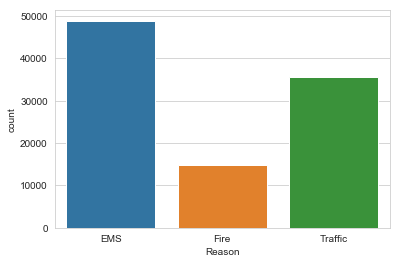

In [10]:
# Countplot based on Reason for 911
sns.countplot(df['Reason'])

### Extracting Timestamp

In [11]:
type(df['timeStamp'].iloc[0]) # dataType of timestamp

str

In [12]:
# Use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
# Creating three different columns based on timestamp data
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
# Notice how the Day of Week is an integer 0-6. 
# Using the .map() with this dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_week'] = df['Day_of_week'].map(dmap)

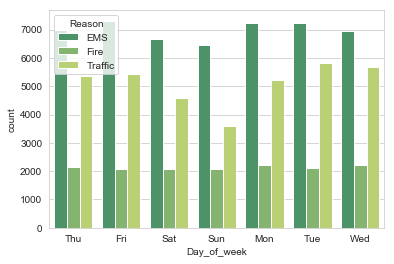

In [15]:
# Creating a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot('Day_of_week', data=df, hue='Reason',palette='summer')

# INSIGHTS:
# Emergency Medical Services and Traffic Cases are less on Weekends
# Emergency Medical Services are more compare to Fire and Traffic

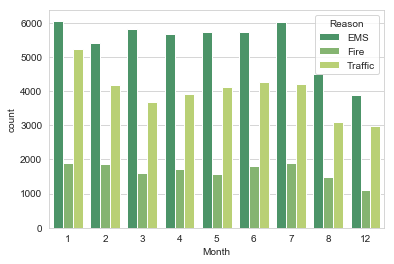

In [16]:
# Creating a countplot of the Month column with the hue based off of the Reason column
sns.countplot('Month', data=df, hue='Reason',palette='summer')

In [17]:
# Grouping By Month Column
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


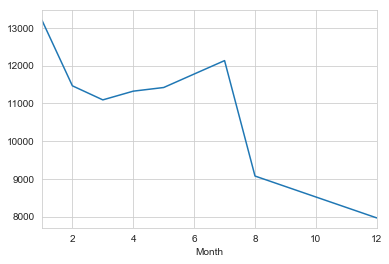

In [18]:
# Plot Based on calls per month
byMonth['twp'].plot()

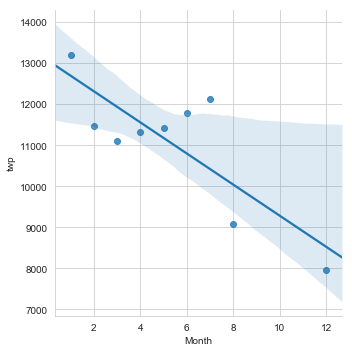

In [19]:
# Seaborns lmplot
sns.lmplot('Month','twp', data=byMonth.reset_index())

In [20]:
# Creating a new column called 'Date' that contains the date from the timeStamp column.
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

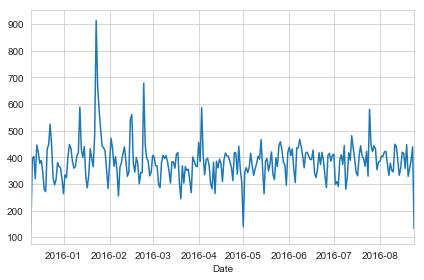

In [21]:
# Grouping the Date column with the count() aggregate and create a plot of counts of 911 calls
df.groupby('Date')['twp'].count().plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

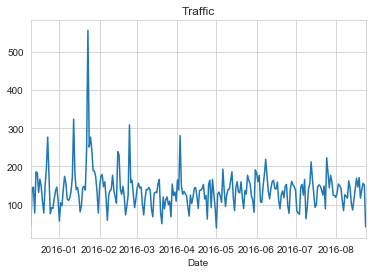

In [22]:
# For traffic
df[df['Reason']=='Traffic'].groupby('Date')['twp'].count().plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

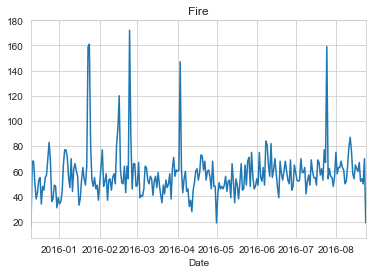

In [23]:
# For Fire
df[df['Reason']=='Fire'].groupby('Date')['twp'].count().plot()
plt.title('Fire')

Text(0.5, 1.0, 'Emergency Medical Services')

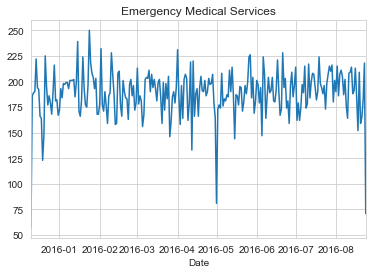

In [24]:
# For Emergency Medical Services
df[df['Reason']=='EMS'].groupby('Date')['twp'].count().plot()
plt.title('Emergency Medical Services')

In [25]:
# Grouping By Hour
dayHour = df.groupby(by=['Day_of_week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


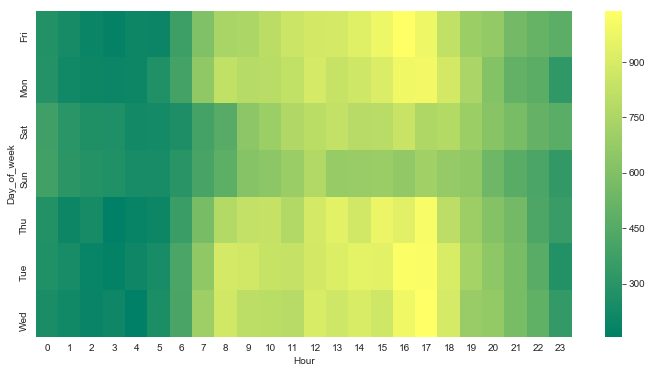

In [26]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='summer')

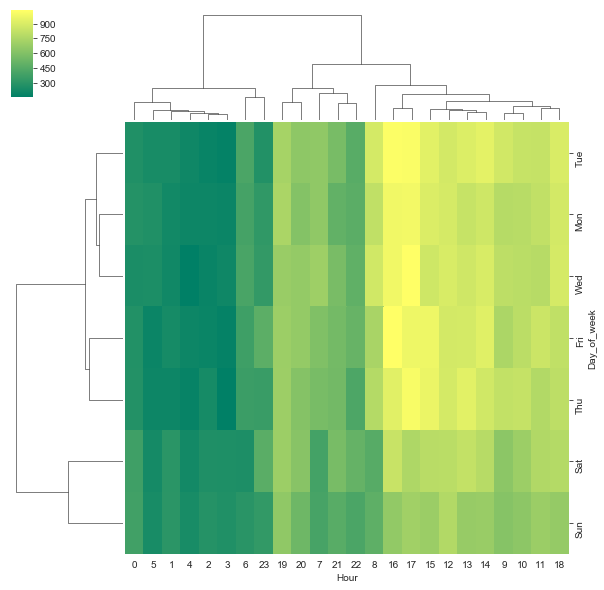

In [27]:
# Clustermap
sns.clustermap(dayHour, cmap='summer')

In [28]:
# Repeating these same plots and operations, for a DataFrame that shows the Month as the column
dayMonth = df.groupby(by=['Day_of_week', 'Month']).count()['Reason'].unstack()

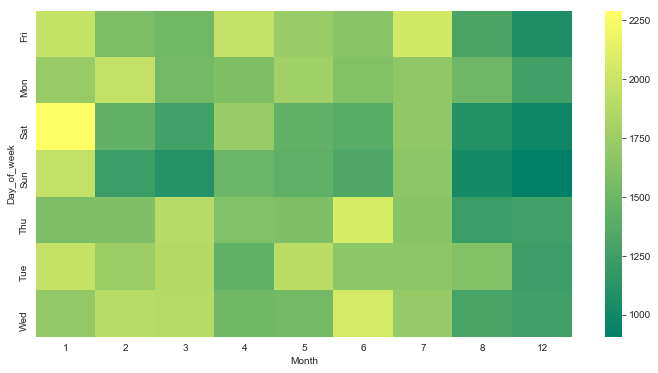

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='summer')

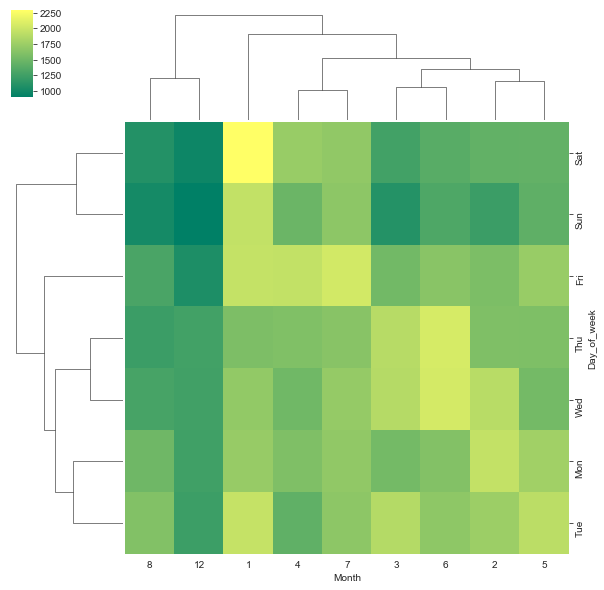

In [30]:
sns.clustermap(dayMonth, cmap='summer')